In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [8]:
filepath = 'iilp.csv'

In [9]:
df = pd.read_csv(filepath)

In [10]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [11]:
#plotting tools
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

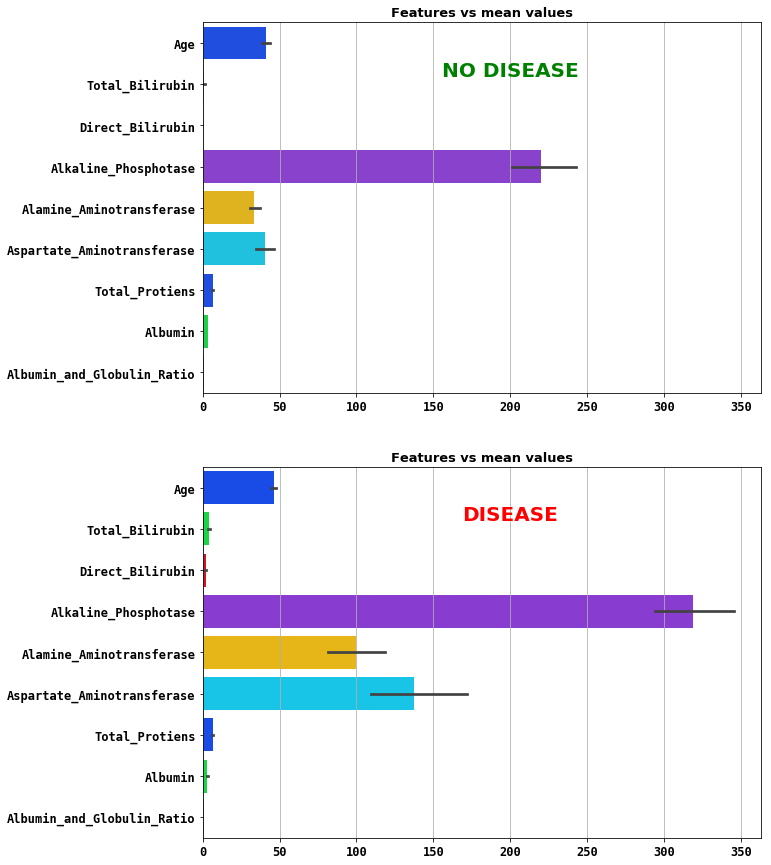

In [12]:
#visualising features of each category of people
data1 = df[df['Dataset']==2] # no disease (original dataset had it labelled as 2 and not 0)
data1 = data1.iloc[:,:-1]

data2 = df[df['Dataset']==1] # with disease
data2 = data2.iloc[:,:-1]

fig = plt.figure(figsize=(10,15))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212,sharex=ax1)

ax1.grid()
ax2.grid()

ax1.set_title('Features vs mean values',fontsize=13,weight='bold')
ax1.text(200,0.8,'NO DISEASE',fontsize=20,horizontalalignment='center',color='green',weight='bold')


ax2.set_title('Features vs mean values',fontsize=13,weight='bold')
ax2.text(200,0.8,'DISEASE',fontsize=20,horizontalalignment='center',color='red',weight='bold')

# for axis ax1
plt.sca(ax1)
plt.xticks(rotation = 0, 
           weight='bold', 
           family='monospace',
           size='large')
plt.yticks( weight='bold', 
           family='monospace',
           size='large')
# for axis ax2
plt.sca(ax2)
plt.xticks(rotation = 0, 
           weight='bold', 
           family='monospace',
           size='large')
plt.yticks( weight='bold', 
           family='monospace',
           size='large')

# sns.set_style('whitegrid')

sns.barplot(data=data1,ax=ax1,orient='horizontal', palette='bright') # no disease
sns.barplot(data=data2,ax=ax2,orient='horizontal',palette='bright',saturation=0.80) # with disease

,Attributes,Mean_Values,Status
0,Total_Bilirubin,4.164423,Diseased
1,Direct_Bilirubin,1.923558,Diseased
2,Alkaline_Phosphotase,319.007212,Diseased
3,Alamine_Aminotransferase,99.605769,Diseased
4,Aspartate_Aminotransferase,137.699519,Diseased
5,Total_Protiens,6.459135,Diseased
6,Albumin,3.060577,Diseased
7,Albumin_and_Globulin_Ratio,0.914179,Diseased
8,Total_Bilirubin,1.142515,Healthy
9,Direct_Bilirubin,0.396407,Healthy


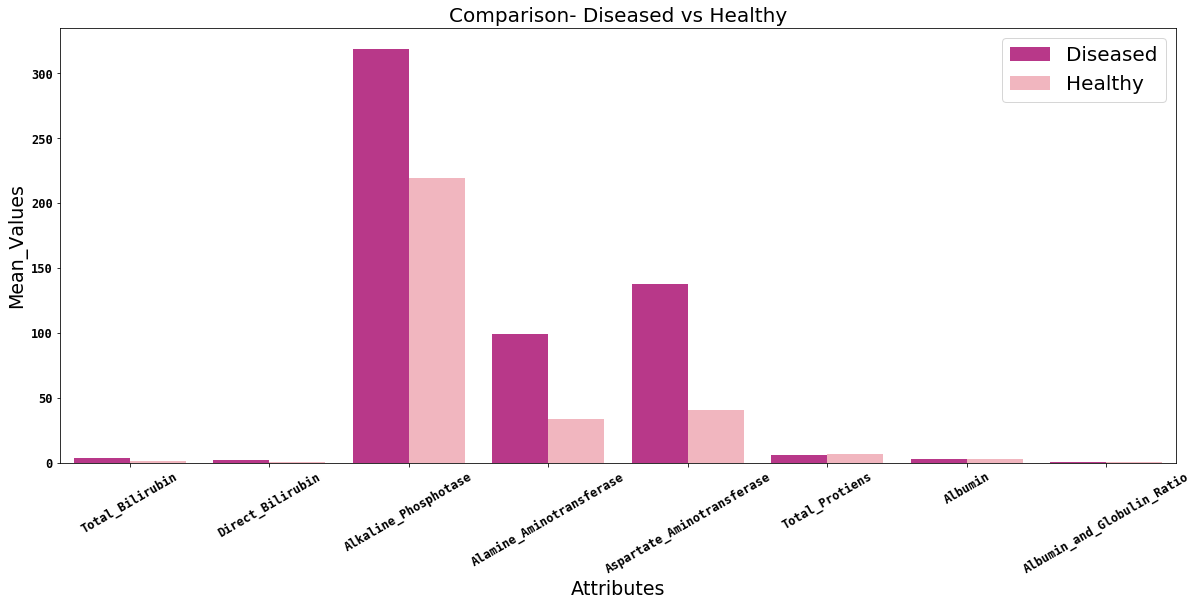

In [13]:
#visualising difference in chemicals in healthy/unhealthy people
with_disease = df[df['Dataset']==1]

with_disease = with_disease.drop(columns=['Gender','Age','Dataset'])
names1 = with_disease.columns.unique()
mean_of_features1 = with_disease.mean(axis=0,skipna=True)


without_disease = df[df['Dataset']==2]

without_disease = without_disease.drop(columns=['Gender','Age','Dataset'])
names2 = without_disease.columns.unique()
mean_of_features2 = without_disease.mean(axis=0,skipna=True)

people = []

for x,y in zip(names1,mean_of_features1):
    people.append([x,y,'Diseased'])
for x,y in zip(names2,mean_of_features2):
    people.append([x,y,'Healthy'])
    
new_data = pd.DataFrame(people,columns=['Attributes','Mean_Values','Status'])

#ValueError: If using all scalar values, you must pass an index
#https://stackoverflow.com/questions/17839973/construct-pandas-dataframe-from-values-in-variables

fig = plt.figure(figsize=(20,8))
plt.title('Comparison- Diseased vs Healthy',size=20,loc='center')
plt.xticks(rotation = 30, 
           weight='bold', 
           family='monospace',
           size='large')
plt.yticks( weight='bold', 
           family='monospace',
           size='large')

g1 = sns.barplot(x='Attributes',y='Mean_Values',hue='Status',data=new_data,palette="RdPu_r")
plt.legend(prop={'size': 20})
plt.xlabel('Attributes',size=19)
plt.ylabel('Mean_Values',size=19)

new_data

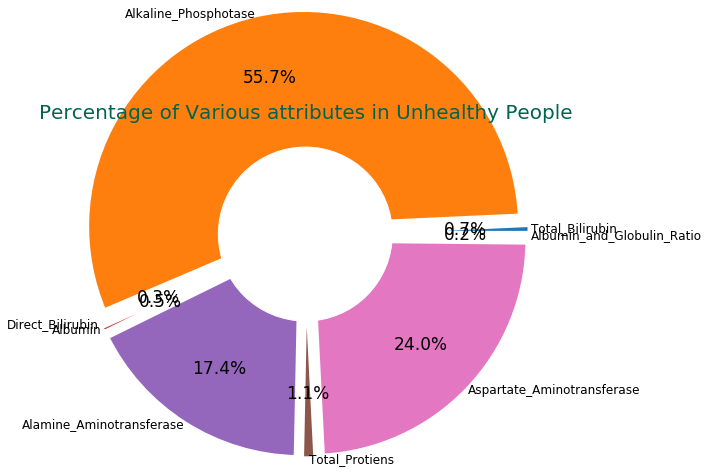

In [14]:
#percentage of chemicals in healthy people
# create data
with_disease = df[df['Dataset']==1]
with_disease = with_disease.drop(columns=['Dataset','Gender','Age'])
names = with_disease.columns.unique()
mean_of_features = with_disease.mean(axis=0,skipna=True)

# I couldn't find a way to automize this list process
# the goal was to arrange numbers in such a way that numbers that are very small compared to 
# others do not stay together
# that is the smaller numbers be embedded between larger numbers
# this helps to visualize pie plot clearly

list_names = ['Total_Bilirubin','Alkaline_Phosphotase','Direct_Bilirubin','Albumin','Alamine_Aminotransferase',
              'Total_Protiens','Aspartate_Aminotransferase','Albumin_and_Globulin_Ratio']
list_means = [4.164423076923075,319.00721153846155,1.923557692307693,3.0605769230769226,
             99.60576923076923,6.459134615384617,137.69951923076923,0.9141787439613527]

l_names = []
l_means = []
mydict = {}
for x,y in zip(names,mean_of_features):
    mydict[x]=y
    l_names.append(x)
    l_means.append(y)


fig = plt.figure()
plt.title('Percentage of Various attributes in Unhealthy People',size=20,color='#016450')
# Create a pieplot
plt.axis('equal')
explode = (0.09,)*(len(list_means))
color_pink=['#7a0177','#ae017e','#dd3497','#f768a1','#fa9fb5','#fcc5c0','#fde0dd','#fff7f3']
wedges, texts, autotexts = plt.pie( list_means,
                                    explode=explode,
                                    labels=list_names, 
                                    labeldistance=1,
                                    textprops=dict(color='k'),
                                    radius=2.5,
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    wedgeprops = { 'linewidth' : 6, 'edgecolor' : 'white' })

plt.setp(autotexts,size=17)
plt.setp(texts,size=12)

# plt.show() # don't show pie here [leave it commented]
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 1, color='white')
p=plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

plt.show()

[None, None, None, None]

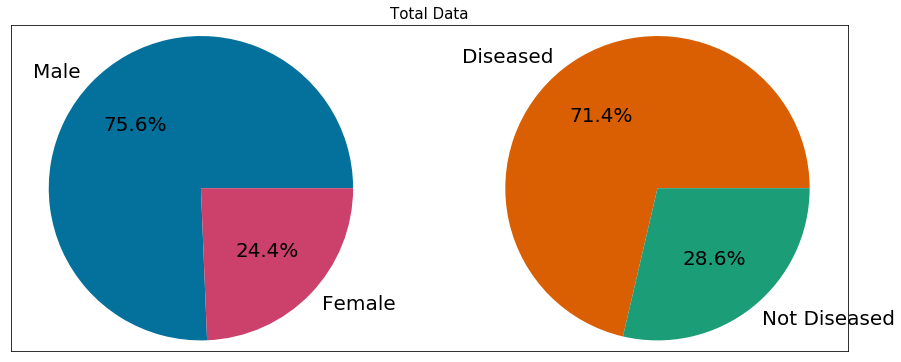

In [15]:
#other stats
fig= plt.figure(figsize=(15,6),frameon=False) # I don't know why figure boundary is still visible
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

only_gender = df['Gender']

male_tot = only_gender[only_gender=='Male']

no_of_male = len(male_tot)
no_of_female = len(df) - len(male_tot)

m_vs_f = [no_of_male,no_of_female]


with_disease = df[df['Dataset']==1]
not_with_disease = df[df['Dataset']==2]

with_disease = with_disease['Gender']

no_of_diseased = len(with_disease)
no_of_not_diseased = len(df) - len(with_disease)

d_vs_healthy = [no_of_diseased,no_of_not_diseased]
'''
By default, plots have more pixels along one axis over the other.
When you add a circle, it's traditionally added in data units. 
If your axes have a symmetric range, that means one step along the x axis 
will involve a different number of pixels than one step along your y axis. 
So a symmetric circle in data units is asymmetric in your Pixel units (what you actually see).
'''

# you can force the x and y axes to have equal number of pixels per data unit. 
# This is done using the plt.axis("equal") or ax.axis("equal") methods 
# (where ax is an instance of an Axes). 

ax1.axis('equal')
ax2.axis('equal')

# pie plot
wedges, texts, autotexts= ax1.pie(m_vs_f, 
                                  labels=('Male','Female'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['xkcd:ocean blue','xkcd:dark pink'],
                                  autopct="%1.1f%%")

# pie plot
wedges2, texts2, autotexts2 = ax2.pie(d_vs_healthy, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#d95f02','#1b9e77'],
                                  autopct="%1.1f%%")


plt.setp(autotexts,size=20)
plt.setp(texts,size=20)
plt.setp(autotexts2,size=20)
plt.setp(texts2,size=20)

Text(0,0.04,'Female')

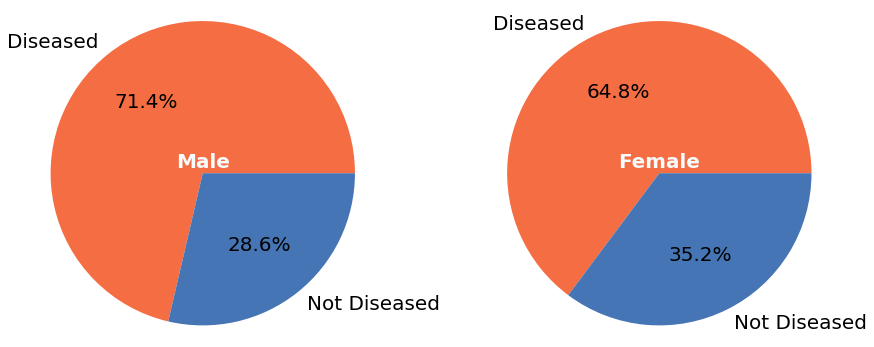

In [16]:
#male vs female
fig= plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

with_disease = df[df['Dataset']==1]
not_with_disease = df[df['Dataset']==2]

with_disease_m = with_disease[with_disease['Gender']=='Male']
with_disease_m = with_disease['Gender']
not_with_disease_m = not_with_disease[not_with_disease['Gender']=='Male']
not_with_disease_m = not_with_disease['Gender']

with_disease_f = with_disease[with_disease['Gender']=='Female']
not_with_disease_f = not_with_disease[not_with_disease['Gender']=='Female']

no_of_diseased_m = len(with_disease_m)
no_of_not_diseased_m = len(not_with_disease_m)

no_of_diseased_f = len(with_disease_f)
no_of_not_diseased_f = len(not_with_disease_f)

d_vs_healthy_m = [no_of_diseased_m, no_of_not_diseased_m]
d_vs_healthy_f = [no_of_diseased_f, no_of_not_diseased_f]

ax1.axis('equal')
ax2.axis('equal')
# pie plot

wedges, texts, autotexts = ax1.pie(d_vs_healthy_m, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#f46d43','#4575b4'],
                                  autopct="%1.1f%%")

wedges2, texts2, autotexts2 = ax2.pie(d_vs_healthy_f, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#f46d43','#4575b4'],
                                  autopct="%1.1f%%")

plt.setp(autotexts,size=20)
plt.setp(texts,size=20)

plt.setp(autotexts2,size=20)
plt.setp(texts2,size=20)

ax1.text(0,0.04,'Male',size=20,color='#f7fcfd',horizontalalignment='center',weight='bold')
ax2.text(0,0.04,'Female',size=20,color='#f7fcfd',horizontalalignment='center',weight='bold')

In [17]:
df['Gender']

0      Female
1        Male
2        Male
3        Male
4        Male
5        Male
6      Female
7      Female
8        Male
9        Male
10       Male
11       Male
12       Male
13     Female
14       Male
15       Male
16       Male
17       Male
18     Female
19     Female
20       Male
21       Male
22       Male
23       Male
24       Male
25       Male
26       Male
27       Male
28       Male
29     Female
        ...  
553      Male
554      Male
555      Male
556      Male
557      Male
558      Male
559      Male
560      Male
561      Male
562      Male
563      Male
564    Female
565      Male
566    Female
567      Male
568    Female
569      Male
570      Male
571      Male
572      Male
573      Male
574      Male
575      Male
576      Male
577      Male
578      Male
579      Male
580      Male
581      Male
582      Male
Name: Gender, Length: 583, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027185A26710>,
      dtype=object)

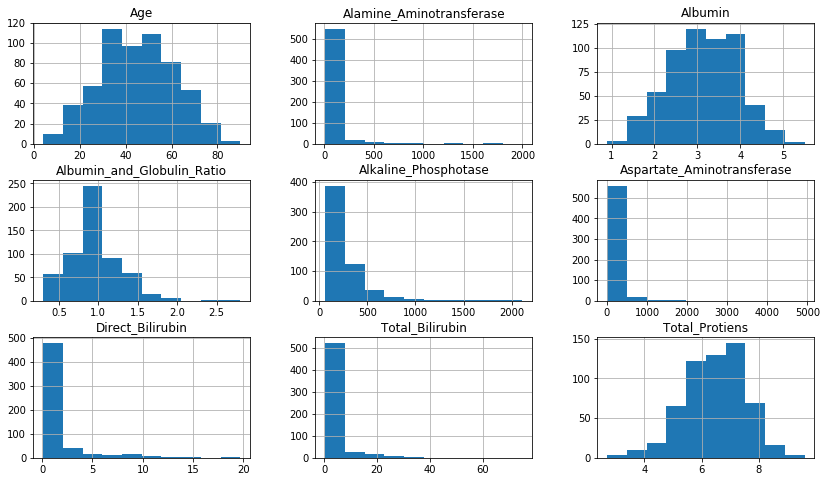

In [18]:
#Plot Histogram
# Split the data into features and target label(disease)
disease_initial = df['Dataset']
features_initial = df.drop('Dataset', axis = 1)

# Visualize skewed continuous features of original data
import matplotlib.pyplot as plt
plt.show(block=True)
features_initial.hist(figsize=(14,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027186808C50>,
      dtype=object)

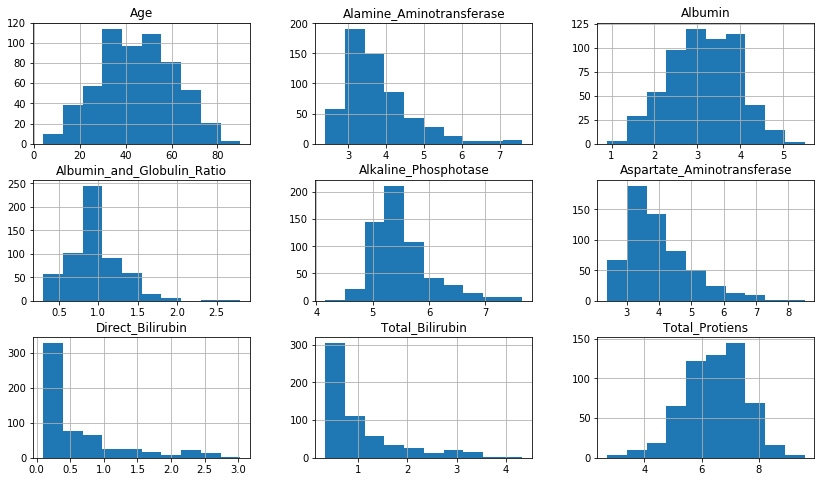

In [19]:
#from above histograms it is visualized that skewed features are
"""Alamine_Aminotransferase
Alkaline_Phosphotase
Aspartate_Aminotransferase
Direct_Bilirubin
Total_Bilirubin"""
#log transform the skewed feature
skewed = ['Alamine_Aminotransferase', 'Direct_Bilirubin', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Aspartate_Aminotransferase']
features_initial[skewed] = df[skewed].apply(lambda x: np.log(x + 1))
df[skewed]=features_initial[skewed]
# Visualize the new log distributions
features_initial.hist(figsize=(14,8))

In [20]:
df['Gender']

0      Female
1        Male
2        Male
3        Male
4        Male
5        Male
6      Female
7      Female
8        Male
9        Male
10       Male
11       Male
12       Male
13     Female
14       Male
15       Male
16       Male
17       Male
18     Female
19     Female
20       Male
21       Male
22       Male
23       Male
24       Male
25       Male
26       Male
27       Male
28       Male
29     Female
        ...  
553      Male
554      Male
555      Male
556      Male
557      Male
558      Male
559      Male
560      Male
561      Male
562      Male
563      Male
564    Female
565      Male
566    Female
567      Male
568    Female
569      Male
570      Male
571      Male
572      Male
573      Male
574      Male
575      Male
576      Male
577      Male
578      Male
579      Male
580      Male
581      Male
582      Male
Name: Gender, Length: 583, dtype: object

In [21]:
#changing gender
#Male:0 Female:1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['Gender'])
label_encoder.transform(df['Gender'])
#df['Age'] = pd.qcut(df['Age'].values, 9,duplicates='drop').codes + 1
#normalized
normalized_df=(df-df.min())/(df.max()-df.min())
df=normalized_df
display(df)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,1.0,0.048609,0.000000,0.308223,0.083659,0.089521,0.594203,0.521739,0.240,0.0
1,0.674419,0.0,0.535785,0.605315,0.684260,0.341403,0.363170,0.695652,0.500000,0.176,0.0
2,0.674419,0.0,0.445585,0.522665,0.582821,0.329197,0.300762,0.623188,0.521739,0.236,0.0
3,0.627907,0.0,0.089297,0.082173,0.300513,0.059605,0.105914,0.594203,0.543478,0.280,0.0
4,0.790698,0.0,0.313641,0.341861,0.320143,0.179554,0.277870,0.666667,0.326087,0.040,0.0
5,0.488372,0.0,0.173536,0.148329,0.338512,0.114891,0.050802,0.710145,0.760870,0.400,0.0
6,0.255814,1.0,0.076455,0.029648,0.253013,0.083659,0.027363,0.623188,0.565217,0.280,0.0
7,0.290698,1.0,0.076455,0.056921,0.330181,0.059605,0.014252,0.579710,0.586957,0.320,0.0
8,0.151163,0.0,0.076455,0.056921,0.330181,0.141750,0.097923,0.681159,0.695652,0.360,1.0
9,0.593023,0.0,0.048609,0.029648,0.433188,0.305772,0.275117,0.594203,0.543478,0.280,0.0


In [22]:

      
#finding null values
"""df.isnull().any() 
#no of null values
df['Albumin_and_Globulin_Ratio'].isnull().sum()
#printing missing values
missing_values_rows = df[df.isnull().any(axis=1)]
print(missing_values_rows)
#replace them with meanvalues
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
df['Albumin_and_Globulin_Ratio'] = imp.fit_transform(df['Albumin_and_Globulin_Ratio'])
#normalize"""
"""import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
array = df.values
X = array[:,0:11]
Y = array[:,11]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[:])"""
df.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(df.shape)
#separate target
X = df.iloc[:,:-1].values
target = df.iloc[:,-1].values
#convert all 2's to zeroes
for u in range(len(target)):
    if target[u] == 2:
        target[u] = 0
df['Dataset']=target
print(len(X))
print(len(target))

(579, 11)
579
579


In [23]:
display(df)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,1.0,0.048609,0.000000,0.308223,0.083659,0.089521,0.594203,0.521739,0.240,0.0
1,0.674419,0.0,0.535785,0.605315,0.684260,0.341403,0.363170,0.695652,0.500000,0.176,0.0
2,0.674419,0.0,0.445585,0.522665,0.582821,0.329197,0.300762,0.623188,0.521739,0.236,0.0
3,0.627907,0.0,0.089297,0.082173,0.300513,0.059605,0.105914,0.594203,0.543478,0.280,0.0
4,0.790698,0.0,0.313641,0.341861,0.320143,0.179554,0.277870,0.666667,0.326087,0.040,0.0
5,0.488372,0.0,0.173536,0.148329,0.338512,0.114891,0.050802,0.710145,0.760870,0.400,0.0
6,0.255814,1.0,0.076455,0.029648,0.253013,0.083659,0.027363,0.623188,0.565217,0.280,0.0
7,0.290698,1.0,0.076455,0.056921,0.330181,0.059605,0.014252,0.579710,0.586957,0.320,0.0
8,0.151163,0.0,0.076455,0.056921,0.330181,0.141750,0.097923,0.681159,0.695652,0.360,1.0
9,0.593023,0.0,0.048609,0.029648,0.433188,0.305772,0.275117,0.594203,0.543478,0.280,0.0


In [24]:
#feature selection
#univariate selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
array = df.values
X = array[:,0:10]
Y = array[:,10]
display(X.shape)
# feature extraction
test = SelectKBest(score_func=chi2, k=7)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

(579, 10)

[ 0.769  2.905  9.961 15.371  1.797  5.064  5.193  0.029  0.904  0.971]
[[1.    0.049 0.    0.308 0.084 0.09  0.24 ]
 [0.    0.536 0.605 0.684 0.341 0.363 0.176]
 [0.    0.446 0.523 0.583 0.329 0.301 0.236]
 [0.    0.089 0.082 0.301 0.06  0.106 0.28 ]
 [0.    0.314 0.342 0.32  0.18  0.278 0.04 ]]


In [25]:
#recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
array = df.values
X = array[:,0:10]
Y = array[:,10]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X, Y)
print("Num Features: %d" % (fit.n_features_))
print("Selected Features: %s" %( fit.support_))
print("Feature Ranking: %s" %(fit.ranking_))
features_rfe=df[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Albumin','Albumin_and_Globulin_Ratio']].values

Num Features: 8
Selected Features: [ True False  True  True  True  True  True False  True  True]
Feature Ranking: [1 3 1 1 1 1 1 2 1 1]


In [26]:
#principle component analysis
# Feature Extraction with PCA
import numpy as np
from sklearn.decomposition import PCA
array = df.values
X = array[:,0:10]
Y = array[:,10]
# feature extraction
pca = PCA(n_components=8)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % (fit.explained_variance_ratio_))
print(fit.components_)

Explained Variance: [0.426 0.231 0.125 0.072 0.062 0.043 0.026 0.009]
[[-0.037  0.949 -0.153 -0.185 -0.042 -0.118 -0.126  0.052  0.079  0.028]
 [ 0.051  0.311  0.49   0.592  0.221  0.292  0.319 -0.07  -0.213 -0.156]
 [ 0.463  0.015 -0.076 -0.102 -0.017 -0.257 -0.176 -0.494 -0.588 -0.287]
 [-0.513  0.021 -0.267 -0.342  0.065  0.44   0.366 -0.374 -0.269 -0.062]
 [ 0.7    0.022 -0.211 -0.266  0.223  0.425  0.323  0.148  0.191  0.043]
 [-0.169 -0.048 -0.088 -0.102  0.831 -0.152 -0.19   0.258 -0.046 -0.364]
 [-0.03  -0.011 -0.053 -0.07  -0.446  0.053  0.159  0.504 -0.145 -0.7  ]
 [ 0.008 -0.002  0.057  0.037 -0.075  0.641 -0.729 -0.099  0.098 -0.169]]


In [27]:
#feature importance
#extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier
array = df.values
X = array[:,0:10]
Y = array[:,10]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
features_etc1=df[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']].values
features_etc2=df[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Albumin']].values

[0.127 0.039 0.113 0.105 0.127 0.12  0.112 0.077 0.09  0.09 ]


In [28]:
all_classes=df['Dataset'].values

###Logistic Regression

In [52]:
import numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.70
[[120   2]
 [ 50   2]]
             precision    recall  f1-score   support

        0.0       0.71      0.98      0.82       122
        1.0       0.50      0.04      0.07        52

avg / total       0.64      0.70      0.60       174



In [528]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
cv_scores = cross_val_score(clf,features, all_classes, cv=10)
cv_scores.mean()

0.7099413495749894

In [53]:
import numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_rfe, target, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.71
[[120   2]
 [ 48   4]]
             precision    recall  f1-score   support

        0.0       0.71      0.98      0.83       122
        1.0       0.67      0.08      0.14        52

avg / total       0.70      0.71      0.62       174



In [54]:
import numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_etc1, target, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.71
[[120   2]
 [ 49   3]]
             precision    recall  f1-score   support

        0.0       0.71      0.98      0.82       122
        1.0       0.60      0.06      0.11        52

avg / total       0.68      0.71      0.61       174



In [55]:
import numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_etc2, target, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.71
[[118   4]
 [ 46   6]]
             precision    recall  f1-score   support

        0.0       0.72      0.97      0.83       122
        1.0       0.60      0.12      0.19        52

avg / total       0.68      0.71      0.64       174



In [61]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
clfs = {
    'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
    'svm1': SVC(kernel='linear'),
    'svm2': SVC(kernel='rbf'),
    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_scores[clf_name] = f1_score(y_pred, y_test)
display(f1_scores)    

mnb
gnb
svm1
svm2
svm3
mlp1
mlp2


C:\Users\shreya kumari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\shreya kumari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\shreya kumari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\shreya kumari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


ada
dtc
rfc
gbc
lr


{'mnb': 0.0,
 'gnb': 0.5569620253164558,
 'svm1': 0.0,
 'svm2': 0.0,
 'svm3': 0.0,
 'mlp1': 0.03773584905660378,
 'mlp2': 0.32,
 'ada': 0.2222222222222222,
 'dtc': 0.3232323232323232,
 'rfc': 0.3170731707317073,
 'gbc': 0.2716049382716049,
 'lr': 0.07142857142857144}

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_rfe, target, test_size=0.3, random_state=0)
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    f1_scores[clf_name] = f1_score(y_pred, y_valid)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_etc1, target, test_size=0.3, random_state=0)
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    f1_scores[clf_name] = f1_score(y_pred, y_valid)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_etc2, target, test_size=0.3, random_state=0)
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    f1_scores[clf_name] = f1_score(y_pred, y_valid)

In [74]:
import numpy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)
nai = MultinomialNB()
nai.fit(X_train, y_train)


y_pred = nai.predict(X_test)
print('Accuracy of naive bayes classifier on test set: {:.2f}'.format(nai.score(X_test, y_test)))


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of naive bayes classifier on test set: 0.70
[[122   0]
 [ 52   0]]
             precision    recall  f1-score   support

        0.0       0.70      1.00      0.82       122
        1.0       0.00      0.00      0.00        52

avg / total       0.49      0.70      0.58       174



C:\Users\shreya kumari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Naive Bayes

In [533]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
cv_scores = cross_val_score(clf,features, all_classes, cv=10)

cv_scores.mean()

0.7150845406912957

In [71]:
import numpy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(features_rfe, target, test_size=0.3, random_state=0)
nai = MultinomialNB()
nai.fit(X_train, y_train)


y_pred = nai.predict(X_test)
print('Accuracy of naive bayes classifier on test set: {:.2f}'.format(nai.score(X_test, y_test)))


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.70
[[122   0]
 [ 52   0]]
             precision    recall  f1-score   support

        0.0       0.70      1.00      0.82       122
        1.0       0.00      0.00      0.00        52

avg / total       0.49      0.70      0.58       174



C:\Users\shreya kumari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
import numpy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(features_etc1, target, test_size=0.3, random_state=0)
nai = MultinomialNB()
nai.fit(X_train, y_train)


y_pred = nai.predict(X_test)
print('Accuracy of naive bayes classifier on test set: {:.2f}'.format(nai.score(X_test, y_test)))


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of naive bayes classifier on test set: 0.70
[[122   0]
 [ 52   0]]
             precision    recall  f1-score   support

        0.0       0.70      1.00      0.82       122
        1.0       0.00      0.00      0.00        52

avg / total       0.49      0.70      0.58       174



C:\Users\shreya kumari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [77]:
#naive bayes
import numpy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(features_etc2, target, test_size=0.3, random_state=0)
nai = MultinomialNB()
nai.fit(X_train, y_train)


y_pred = nai.predict(X_test)
print('Accuracy of naive bayes classifier on test set: {:.2f}'.format(nai.score(X_test, y_test)))


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of naive bayes classifier on test set: 0.70
[[122   0]
 [ 52   0]]
             precision    recall  f1-score   support

        0.0       0.70      1.00      0.82       122
        1.0       0.00      0.00      0.00        52

avg / total       0.49      0.70      0.58       174



C:\Users\shreya kumari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Neural Network

In [31]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model1():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(400, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(400, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; adam seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [34]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
def create_model2():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(400, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(400, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; adam seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [543]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model3():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(8, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; adam seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [32]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model1, epochs=100, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator,features, all_classes, cv=10)
cv_scores.mean()

0.6859044184702062

In [ ]:
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model2, epochs=100, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator,X, all_classes, cv=10)
cv_scores.mean()

In [547]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model3, epochs=100, verbose=2)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator,features_etc1, all_classes, cv=10)
cv_scores.mean()

Epoch 1/100
 - 3s - loss: 0.6912 - acc: 0.7159
Epoch 2/100
 - 0s - loss: 0.6870 - acc: 0.7159
Epoch 3/100
 - 0s - loss: 0.6821 - acc: 0.7159
Epoch 4/100
 - 0s - loss: 0.6760 - acc: 0.7159
Epoch 5/100
 - 0s - loss: 0.6686 - acc: 0.7159
Epoch 6/100
 - 0s - loss: 0.6595 - acc: 0.7159
Epoch 7/100
 - 0s - loss: 0.6492 - acc: 0.7159
Epoch 8/100
 - 0s - loss: 0.6373 - acc: 0.7159
Epoch 9/100
 - 0s - loss: 0.6247 - acc: 0.7159
Epoch 10/100
 - 0s - loss: 0.6129 - acc: 0.7159
Epoch 11/100
 - 0s - loss: 0.6019 - acc: 0.7159
Epoch 12/100
 - 0s - loss: 0.5936 - acc: 0.7159
Epoch 13/100
 - 0s - loss: 0.5869 - acc: 0.7159
Epoch 14/100
 - 0s - loss: 0.5823 - acc: 0.7159
Epoch 15/100
 - 0s - loss: 0.5795 - acc: 0.7159
Epoch 16/100
 - 0s - loss: 0.5775 - acc: 0.7159
Epoch 17/100
 - 0s - loss: 0.5759 - acc: 0.7159
Epoch 18/100
 - 0s - loss: 0.5746 - acc: 0.7159
Epoch 19/100
 - 0s - loss: 0.5733 - acc: 0.7159
Epoch 20/100
 - 0s - loss: 0.5722 - acc: 0.7159
Epoch 21/100
 - 0s - loss: 0.5712 - acc: 0.7159
E

Epoch 73/100
 - 0s - loss: 0.4863 - acc: 0.7159
Epoch 74/100
 - 0s - loss: 0.4861 - acc: 0.7140
Epoch 75/100
 - 0s - loss: 0.4860 - acc: 0.7102
Epoch 76/100
 - 0s - loss: 0.4859 - acc: 0.7083
Epoch 77/100
 - 0s - loss: 0.4858 - acc: 0.7083
Epoch 78/100
 - 0s - loss: 0.4859 - acc: 0.7159
Epoch 79/100
 - 0s - loss: 0.4858 - acc: 0.7198
Epoch 80/100
 - 0s - loss: 0.4853 - acc: 0.7140
Epoch 81/100
 - 0s - loss: 0.4859 - acc: 0.7083
Epoch 82/100
 - 0s - loss: 0.4852 - acc: 0.7159
Epoch 83/100
 - 0s - loss: 0.4852 - acc: 0.7159
Epoch 84/100
 - 0s - loss: 0.4853 - acc: 0.7236
Epoch 85/100
 - 0s - loss: 0.4851 - acc: 0.7179
Epoch 86/100
 - 0s - loss: 0.4852 - acc: 0.7198
Epoch 87/100
 - 0s - loss: 0.4850 - acc: 0.7179
Epoch 88/100
 - 0s - loss: 0.4849 - acc: 0.7198
Epoch 89/100
 - 0s - loss: 0.4851 - acc: 0.7217
Epoch 90/100
 - 0s - loss: 0.4851 - acc: 0.7198
Epoch 91/100
 - 0s - loss: 0.4850 - acc: 0.7217
Epoch 92/100
 - 0s - loss: 0.4849 - acc: 0.7236
Epoch 93/100
 - 0s - loss: 0.4848 - acc:

 - 0s - loss: 0.6141 - acc: 0.7140
Epoch 45/100
 - 0s - loss: 0.6134 - acc: 0.7140
Epoch 46/100
 - 0s - loss: 0.6127 - acc: 0.7140
Epoch 47/100
 - 0s - loss: 0.6121 - acc: 0.7140
Epoch 48/100
 - 0s - loss: 0.6114 - acc: 0.7140
Epoch 49/100
 - 0s - loss: 0.6108 - acc: 0.7140
Epoch 50/100
 - 0s - loss: 0.6101 - acc: 0.7140
Epoch 51/100
 - 0s - loss: 0.6096 - acc: 0.7140
Epoch 52/100
 - 0s - loss: 0.6090 - acc: 0.7140
Epoch 53/100
 - 0s - loss: 0.6085 - acc: 0.7140
Epoch 54/100
 - 0s - loss: 0.6080 - acc: 0.7140
Epoch 55/100
 - 0s - loss: 0.6075 - acc: 0.7140
Epoch 56/100
 - 0s - loss: 0.6071 - acc: 0.7140
Epoch 57/100
 - 0s - loss: 0.6066 - acc: 0.7140
Epoch 58/100
 - 0s - loss: 0.6062 - acc: 0.7140
Epoch 59/100
 - 0s - loss: 0.6059 - acc: 0.7140
Epoch 60/100
 - 0s - loss: 0.6054 - acc: 0.7140
Epoch 61/100
 - 0s - loss: 0.6050 - acc: 0.7140
Epoch 62/100
 - 0s - loss: 0.6047 - acc: 0.7140
Epoch 63/100
 - 0s - loss: 0.6043 - acc: 0.7140
Epoch 64/100
 - 0s - loss: 0.6041 - acc: 0.7140
Epoch

Epoch 16/100
 - 0s - loss: 0.5633 - acc: 0.7217
Epoch 17/100
 - 0s - loss: 0.5615 - acc: 0.7217
Epoch 18/100
 - 0s - loss: 0.5594 - acc: 0.7217
Epoch 19/100
 - 0s - loss: 0.5574 - acc: 0.7217
Epoch 20/100
 - 0s - loss: 0.5555 - acc: 0.7217
Epoch 21/100
 - 0s - loss: 0.5535 - acc: 0.7217
Epoch 22/100
 - 0s - loss: 0.5515 - acc: 0.7217
Epoch 23/100
 - 0s - loss: 0.5493 - acc: 0.7217
Epoch 24/100
 - 0s - loss: 0.5470 - acc: 0.7217
Epoch 25/100
 - 0s - loss: 0.5449 - acc: 0.7217
Epoch 26/100
 - 0s - loss: 0.5429 - acc: 0.7217
Epoch 27/100
 - 0s - loss: 0.5402 - acc: 0.7217
Epoch 28/100
 - 0s - loss: 0.5381 - acc: 0.7217
Epoch 29/100
 - 0s - loss: 0.5357 - acc: 0.7217
Epoch 30/100
 - 0s - loss: 0.5336 - acc: 0.7217
Epoch 31/100
 - 0s - loss: 0.5316 - acc: 0.7217
Epoch 32/100
 - 0s - loss: 0.5293 - acc: 0.7217
Epoch 33/100
 - 0s - loss: 0.5273 - acc: 0.7217
Epoch 34/100
 - 0s - loss: 0.5249 - acc: 0.7217
Epoch 35/100
 - 0s - loss: 0.5232 - acc: 0.7217
Epoch 36/100
 - 0s - loss: 0.5221 - acc:

Epoch 87/100
 - 0s - loss: 0.4946 - acc: 0.7236
Epoch 88/100
 - 0s - loss: 0.4945 - acc: 0.7217
Epoch 89/100
 - 0s - loss: 0.4945 - acc: 0.7236
Epoch 90/100
 - 0s - loss: 0.4944 - acc: 0.7179
Epoch 91/100
 - 0s - loss: 0.4941 - acc: 0.7083
Epoch 92/100
 - 0s - loss: 0.4943 - acc: 0.7121
Epoch 93/100
 - 0s - loss: 0.4942 - acc: 0.7083
Epoch 94/100
 - 0s - loss: 0.4941 - acc: 0.7121
Epoch 95/100
 - 0s - loss: 0.4938 - acc: 0.7063
Epoch 96/100
 - 0s - loss: 0.4941 - acc: 0.7179
Epoch 97/100
 - 0s - loss: 0.4944 - acc: 0.7121
Epoch 98/100
 - 0s - loss: 0.4938 - acc: 0.7102
Epoch 99/100
 - 0s - loss: 0.4939 - acc: 0.7198
Epoch 100/100
 - 0s - loss: 0.4937 - acc: 0.7236
Epoch 1/100
 - 4s - loss: 0.6910 - acc: 0.7236
Epoch 2/100
 - 0s - loss: 0.6857 - acc: 0.7236
Epoch 3/100
 - 0s - loss: 0.6791 - acc: 0.7236
Epoch 4/100
 - 0s - loss: 0.6699 - acc: 0.7236
Epoch 5/100
 - 0s - loss: 0.6576 - acc: 0.7236
Epoch 6/100
 - 0s - loss: 0.6406 - acc: 0.7236
Epoch 7/100
 - 0s - loss: 0.6195 - acc: 0.723

 - 0s - loss: 0.5155 - acc: 0.7140
Epoch 59/100
 - 0s - loss: 0.5149 - acc: 0.7140
Epoch 60/100
 - 0s - loss: 0.5143 - acc: 0.7140
Epoch 61/100
 - 0s - loss: 0.5136 - acc: 0.7140
Epoch 62/100
 - 0s - loss: 0.5129 - acc: 0.7140
Epoch 63/100
 - 0s - loss: 0.5126 - acc: 0.7140
Epoch 64/100
 - 0s - loss: 0.5121 - acc: 0.7140
Epoch 65/100
 - 0s - loss: 0.5113 - acc: 0.7140
Epoch 66/100
 - 0s - loss: 0.5115 - acc: 0.7140
Epoch 67/100
 - 0s - loss: 0.5106 - acc: 0.7140
Epoch 68/100
 - 0s - loss: 0.5107 - acc: 0.7140
Epoch 69/100
 - 0s - loss: 0.5100 - acc: 0.7140
Epoch 70/100
 - 0s - loss: 0.5095 - acc: 0.7140
Epoch 71/100
 - 0s - loss: 0.5094 - acc: 0.7140
Epoch 72/100
 - 0s - loss: 0.5090 - acc: 0.7140
Epoch 73/100
 - 0s - loss: 0.5089 - acc: 0.7140
Epoch 74/100
 - 0s - loss: 0.5089 - acc: 0.7140
Epoch 75/100
 - 0s - loss: 0.5089 - acc: 0.7140
Epoch 76/100
 - 0s - loss: 0.5084 - acc: 0.7140
Epoch 77/100
 - 0s - loss: 0.5079 - acc: 0.7140
Epoch 78/100
 - 0s - loss: 0.5077 - acc: 0.7140
Epoch

0.7047791902577596

In [546]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model1, epochs=100, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator,features_etc2, all_classes, cv=10)
cv_scores.mean()

0.715154266494444

## knn 

In [79]:
from sklearn import neighbors

In [550]:
import numpy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(features_etc2, target, test_size=0.3, random_state=0)
nai = MultinomialNB()
nai.fit(X_train, y_train)


y_pred = nai.predict(X_test)
print('Accuracy of naive bayes classifier on test set: {:.2f}'.format(nai.score(X_test, y_test)))


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, features, all_classes, cv=10)
    print (n, cv_scores.mean())

1 0.687401437550627
2 0.7010504783290782
3 0.6837747495565331
4 0.6853799460662177
5 0.6803567217283418
6 0.6803556963712613
7 0.6926363981256473
8 0.695995980600244
9 0.6961733673751884
10 0.6958760138218134
11 0.6942395439211705
12 0.704439283480472
13 0.6994432311052323
14 0.7078573113086633
15 0.6957550216863022
16 0.6991751002286547
17 0.692396464568786
18 0.6990259107734269
19 0.7042003752806915
20 0.7111876711064629
21 0.702535708060332
22 0.7044080100895136
23 0.6992940416500046
24 0.7148748551683124
25 0.7078875593425411
26 0.7201077650291714
27 0.707947030053216
28 0.7218319029602059
29 0.7132988813354251
30 0.7220113404493115
31 0.7201974837737242
32 0.7184723204856092
33 0.716628215776144
34 0.7270658381781455
35 0.7217432095727336
36 0.7166594891671025
37 0.7130912465266028
38 0.7235883396392795
39 0.7114265793062434
40 0.7218631763511643
41 0.7200795677094549
42 0.7270668635352261
43 0.7253135029273945
44 0.7271263342459011
45 0.7288514975340163
46 0.7235883396392794
47 0

In [78]:
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, features_rfe, all_classes, cv=10)
    print (n, cv_scores.mean())
    print(n,cv_scores)

NameError: name 'neighbors' is not defined

In [552]:
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, features_etc1, all_classes, cv=10)
    print (n, cv_scores.mean())

1 0.6701298102064043
2 0.6809514288350919
3 0.6737544474863371
4 0.6994724537820296
5 0.6910886216124765
6 0.7011401970736308
7 0.7064023296112871
8 0.6928440329344694
9 0.6841003004296247
10 0.6995350005639464
11 0.6803546710141807
12 0.6978390599526285
13 0.6873127441631548
14 0.6978975053062229
15 0.6909102094804516
16 0.6806520245675556
17 0.6821967250094845
18 0.685705496939309
19 0.6805028351123278
20 0.6909686548340459
21 0.6788361171778072
22 0.6890358567371087
23 0.6821080316220123
24 0.6855270848072841
25 0.6856168035518369
26 0.6890650794139058
27 0.6909989028679238
28 0.6821675023326874
29 0.6821967250094845
30 0.6873701641596687
31 0.6840408297189496
32 0.6926040993776083
33 0.6804433644016529
34 0.6925748767008111
35 0.689126600838742
36 0.7029520030350569
37 0.68237616249859
38 0.6995027018159073
39 0.6961138966645134
40 0.7115152726937154
41 0.704677166323172
42 0.7115757687614711
43 0.7082161862868743
44 0.7152034821126457
45 0.7118136516041711
46 0.7151732340787678
47

In [553]:
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, features_etc2, all_classes, cv=10)
    print (n, cv_scores.mean())

1 0.6579378018394906
2 0.6754514134547356
3 0.6792272909040573
4 0.6946881376439346
5 0.6723871338193526
6 0.6874034882647881
7 0.6804454151158141
8 0.6855896315892009
9 0.6684348949521671
10 0.6839249643688414
11 0.6717057840392917
12 0.6819931916289848
13 0.6731617910937484
14 0.6856209049801594
15 0.6665615675659048
16 0.6962056661232274
17 0.6789007146738852
18 0.6840439057901915
19 0.6824094866037098
20 0.7014073025931281
21 0.6838049975904108
22 0.6943000399889262
23 0.6805946045710418
24 0.6961138966645133
25 0.6857075476534703
26 0.6962025900519856
27 0.6785992596921877
28 0.6839813590082746
29 0.6822874691111179
30 0.6874296348703436
31 0.6839793082941134
32 0.687428609513263
33 0.684039804361869
34 0.7031888605206763
35 0.6910271001876402
36 0.6926030740205276
37 0.6857357449731869
38 0.6959647072092856
39 0.6874901309380992
40 0.6959052364986107
41 0.6855886062321204
42 0.6993555630748409
43 0.6856178289089174
44 0.6874316855845047
45 0.6996831646620936
46 0.7047376623909276

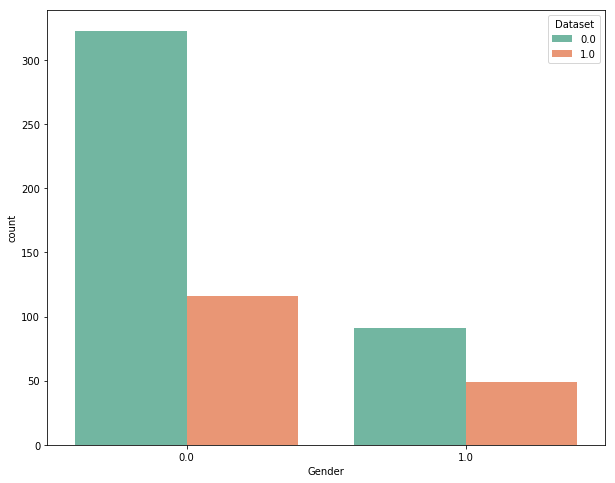

In [494]:
from matplotlib import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8
sns.countplot(x='Gender',hue='Dataset',data=df,palette="Set2");

In [3]:
"""
 NeuralNetwork.py  (author: Anson Wong / git: ankonzoid)
"""
import math, random
import numpy as np

class NeuralNetwork:

    def __init__(self, input_dim=None, output_dim=None, hidden_layers=None, seed=1):
        if (input_dim is None) or (output_dim is None) or (hidden_layers is None):
            raise Exception("Invalid arguments given!")
        self.input_dim = input_dim # number of input nodes
        self.output_dim = output_dim # number of output nodes
        self.hidden_layers = hidden_layers # number of hidden nodes @ each layer
        self.network = self._build_network(seed=seed)

    # Train network
    def train(self, X, y, eta=0.5, n_epochs=200):
        for epoch in range(n_epochs):
            for (x_, y_) in zip(X, y):
                self._forward_pass(x_) # forward pass (update node["output"])
                yhot_ = self._one_hot_encoding(y_, self.output_dim) # one-hot target
                self._backward_pass(yhot_) # backward pass error (update node["delta"])
                self._update_weights(x_, eta) # update weights (update node["weight"])

    # Predict using argmax of logits
    def predict(self, X):
        ypred = np.array([np.argmax(self._forward_pass(x_)) for x_ in X], dtype=np.int)
        return ypred

    # ==============================
    #
    # Internal functions
    #
    # ==============================

    # Build fully-connected neural network (no bias terms)
    def _build_network(self, seed=1):
        random.seed(seed)

        # Create a single fully-connected layer
        def _layer(input_dim, output_dim):
            layer = []
            for i in range(output_dim):
                weights = [random.random() for _ in range(input_dim)] # sample N(0,1)
                node = {"weights": weights, # list of weights
                        "output": None, # scalar
                        "delta": None} # scalar
                layer.append(node)
            return layer

        # Stack layers (input -> hidden -> output)
        network = []
        if len(self.hidden_layers) == 0:
            network.append(_layer(self.input_dim, self.output_dim))
        else:
            network.append(_layer(self.input_dim, self.hidden_layers[0]))
            for i in range(1, len(self.hidden_layers)):
                network.append(_layer(self.hidden_layers[i-1], self.hidden_layers[i]))
            network.append(_layer(self.hidden_layers[-1], self.output_dim))

        return network

    # Forward-pass (updates node['output'])
    def _forward_pass(self, x):
        transfer = self._sigmoid
        x_in = x
        for layer in self.network:
            x_out = []
            for node in layer:
                node['output'] = transfer(self._dotprod(node['weights'], x_in))
                x_out.append(node['output'])
            x_in = x_out # set output as next input
        return x_in

    # Backward-pass (updates node['delta'], L2 loss is assumed)
    def _backward_pass(self, yhot):
        transfer_derivative = self._sigmoid_derivative # sig' = f(sig)
        n_layers = len(self.network)
        for i in reversed(range(n_layers)): # traverse backwards
            if i == n_layers - 1:
                # Difference between logits and one-hot target
                for j, node in enumerate(self.network[i]):
                    err = node['output'] - yhot[j]
                    node['delta'] = err * transfer_derivative(node['output'])
            else:
                # Weighted sum of deltas from upper layer
                for j, node in enumerate(self.network[i]):
                    err = sum([node_['weights'][j] * node_['delta'] for node_ in self.network[i+1]])
                    node['delta'] = err * transfer_derivative(node['output'])

    # Update weights (updates node['weight'])
    def _update_weights(self, x, eta):
        for i, layer in enumerate(self.network):
            # Grab input values
            if i == 0: inputs = x
            else: inputs = [node_['output'] for node_ in self.network[i-1]]
            # Update weights
            for node in layer:
                for j, input in enumerate(inputs):
                    # dw = - learning_rate * (error * transfer') * input
                    node['weights'][j] += - eta * node['delta'] * input

    # Dot product
    def _dotprod(self, a, b):
        return sum([a_ * b_ for (a_, b_) in zip(a, b)])

    # Sigmoid (activation function)
    def _sigmoid(self, x):
        return 1.0/(1.0+math.exp(-x))

    # Sigmoid derivative
    def _sigmoid_derivative(self, sigmoid):
        return sigmoid*(1.0-sigmoid)

    # One-hot encoding
    def _one_hot_encoding(self, idx, output_dim):
        x = np.zeros(output_dim, dtype=np.int)
        x[idx] = 1
        return x
import numpy as np

"""
 utils.py  (author: Anson Wong / git: ankonzoid)
"""
import numpy as np
import pandas as pd

# Read csv file for (X, y, n_classes) data
def read_csv(csv_filename, target_name="y", normalize=False):

    # Read csv
    df = pd.read_csv(csv_filename, delimiter=",", dtype={target_name: np.str})

    # Check target exists
    if list(df.columns.values).count(target_name) != 1:
        raise Exception("Need exactly 1 count of '{}' in {}".format(target_name, csv_filename))

    # Create (target -> index) mapping
    map = {}
    targets_unique = sorted(list(set(df[target_name].values)))
    for i, target in enumerate(targets_unique):
        map[target] = i

    def class2idx(y_, map):
        if y_ in map.keys(): return map[y_]
        else: raise Exception("Invalid key provided!")

    # Grab features and targets
    X = df.drop([target_name], axis=1).values
    y = np.vectorize(class2idx)(df[target_name], map)
    n_classes = len(map.keys())

    # Check shapes
    if X.shape[0] != y.shape[0]:
        raise Exception("X.shape = {} and y.shape = {} are inconsistent!".format(X.shape, y.shape))

    # Normalize (optional)
    if normalize: X = (X - X.mean(axis=0)) / X.std(axis=0)

    return X, y, n_classes

# Randomly permute [0,N] and extract indices for each fold
def crossval_folds(N, n_folds, seed=1):
    np.random.seed(seed)
    idx_all_permute = np.random.permutation(N)
    N_fold = int(N/n_folds)
    idx_folds = []
    for i in range(n_folds):
        start = i*N_fold
        end = min([(i+1)*N_fold, N])
        idx_folds.append(idx_all_permute[start:end])
    return idx_folds

def main():
    # ===================================
    # Settings
    # ===================================
    csv_filename = "iilp.csv"
    hidden_layers = [5] # number of nodes in hidden layers i.e. [layer1, layer2, ...]
    eta = 0.1 # learning rate
    n_epochs = 400 # number of training epochs
    n_folds = 4 # number of folds for cross-validation
    seed_crossval = 1 # seed for cross-validation
    seed_weights = 1 # seed for NN weight initialization

    # ===================================
    # Read csv data + normalize features
    # ===================================
    print("Reading '{}'...".format(csv_filename))
    X, y, n_classes = read_csv(csv_filename, target_name="Dataset", normalize=True)
    N, d = X.shape
    print(" -> X.shape = {}, y.shape = {}, n_classes = {}\n".format(X.shape, y.shape, n_classes))

    print("Neural network model:")
    print(" input_dim = {}".format(d))
    print(" hidden_layers = {}".format(hidden_layers))
    print(" output_dim = {}".format(n_classes))
    print(" eta = {}".format(eta))
    print(" n_epochs = {}".format(n_epochs))
    print(" n_folds = {}".format(n_folds))
    print(" seed_crossval = {}".format(seed_crossval))
    print(" seed_weights = {}\n".format(seed_weights))

    # ===================================
    # Create cross-validation folds
    # ===================================
    idx_all = np.arange(0, N)
    idx_folds = crossval_folds(N, n_folds, seed=seed_crossval) # list of list of fold indices

    # ===================================
    # Train/evaluate the model on each fold
    # ===================================
    acc_train, acc_valid = list(), list()  # training/test accuracy score
    print("Cross-validating with {} folds...".format(len(idx_folds)))
    for i, idx_valid in enumerate(idx_folds):

        # Collect training and test data from folds
        idx_train = np.delete(idx_all, idx_valid)
        X_train, y_train = X[idx_train], y[idx_train]
        X_valid, y_valid = X[idx_valid], y[idx_valid]

        # Build neural network classifier model and train
        model = NeuralNetwork(input_dim=d, output_dim=n_classes,
                              hidden_layers=hidden_layers, seed=seed_weights)
        model.train(X_train, y_train, eta=eta, n_epochs=n_epochs)

        # Make predictions for training and test data
        ypred_train = model.predict(X_train)
        ypred_valid = model.predict(X_valid)

        # Compute training/test accuracy score from predicted values
        acc_train.append(100*np.sum(y_train==ypred_train)/len(y_train))
        acc_valid.append(100*np.sum(y_valid==ypred_valid)/len(y_valid))

        # Print cross-validation result
        print(" Fold {}/{}: acc_train = {:.2f}%, acc_valid = {:.2f}% (n_train = {}, n_valid = {})".format(
            i+1, n_folds, acc_train[-1], acc_valid[-1], len(X_train), len(X_valid)))

    # ===================================
    # Print results
    # ===================================
    print("  -> acc_train_avg = {:.2f}%, acc_valid_avg = {:.2f}%".format(
        sum(acc_train)/float(len(acc_train)), sum(acc_valid)/float(len(acc_valid))))

# Driver
if __name__ == "__main__":
    main()

Reading 'iilp.csv'...


TypeError: unsupported operand type(s) for /: 'str' and 'int'